<a href="https://colab.research.google.com/github/Ristinoa/CS-archive/blob/main/ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# @title Imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.naive_bayes import MultinomialNB

In [8]:
# @title Function Definitions
def eval_model(classifier, X_test, y_test):
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy}")

  y_test_labels = np.where(y_test == 0, "reliable", "unreliable")
  y_pred_labels = np.where(y_pred == 0, "reliable", "unreliable")

  unique_labels = ["reliable", "unreliable"]

  cm = confusion_matrix(y_test_labels, y_pred_labels, labels=unique_labels)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
  disp.plot()
  return accuracy

def build_model(clf, X, y):
  if clf == "gnb":
    classifier = GaussianNB()
  elif clf == "knn":
    classifier = KNeighborsClassifier(n_neighbors=3)
  elif clf == "svm":
    classifier = LinearSVC()
  elif clf == "mnb":
    classifier = MultinomialNB()

  classifier.fit(X, y)
  return classifier

def feature_selection(selection, X_train, y_train, X_test, y_test):
  if selection == "mif":
    selector = SelectKBest(mutual_info_classif, k=30)
  elif selection == "f_classif":
    selector = SelectKBest(f_classif, k=30)
  else:
    selector = SelectKBest(chi2, k=30)
  X_train_new = selector.fit_transform(X_train, y_train)
  X_test_new = selector.transform(X_test)
  return X_train_new, X_test_new

def feature_extraction(X_train, X_test, feat, extraction, lowercase, stop_words,  ngram_range, norm):
  stop = [False, "english"]
  if feat == "tfidf":
    vect = TfidfVectorizer(lowercase=lowercase, stop_words=stop[stop_words], ngram_range=ngram_range, norm=norm, sublinear_tf=True)
  elif feat == "hash":
    vect = HashingVectorizer(lowercase=lowercase, stop_words=stop[stop_words], ngram_range=ngram_range, norm=norm)
  else:
    vect = CountVectorizer(lowercase=lowercase, stop_words=stop[stop_words], ngram_range=ngram_range)

  X_train_new = vect.fit_transform(X_train).toarray()
  X_test_new = vect.transform(X_test).toarray()
  return X_train_new, X_test_new

def get_data(feat, n_rows, extraction, lowercase, stop_words, ngram_range, norm, selection):
  df = pd.read_csv("train.csv", nrows=n_rows, engine="python")
  df["combined"] = df['title'] + ' ' + df['author'] + ' ' + df['text']
  X = df[feat]
  y = df["label"]
  X.fillna("", inplace=True)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  X_train_new, X_test_new = feature_extraction(X_train, X_test, feat, extraction, lowercase, stop_words, ngram_range, norm)
  X_train_final, X_test_final = feature_selection(selection, X_train_new, y_train, X_test_new, y_test)
  return X_train_final, X_test_final, y_train, y_test

def run_experiment(clf: str, extraction: str, lowercase: bool, stop_words: int, norm: str, selection: str, feat: str, ngram_range: tuple = (1,1), n_rows: int = 5000):
  X_train, X_test, y_train, y_test = get_data(feat=feat, n_rows=n_rows, extraction=extraction, lowercase=lowercase, stop_words=stop_words, ngram_range=ngram_range, norm=norm, selection=selection)
  classifier = build_model(clf, X_train, y_train)
  print(f"Classifier: {clf}")
  print(f"Extraction: {extraction}")
  print(f"ngram_range: {ngram_range}")
  accuracy = eval_model(classifier, X_test, y_test)
  return accuracy

Classifier: gnb
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.842
Classifier: mnb
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.907
Classifier: knn
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.916
Classifier: svm
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.944


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.944

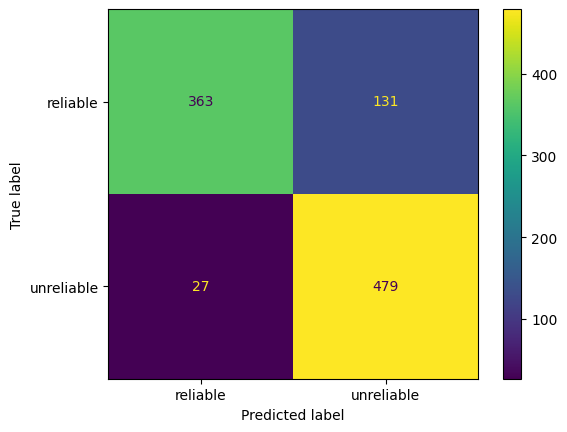

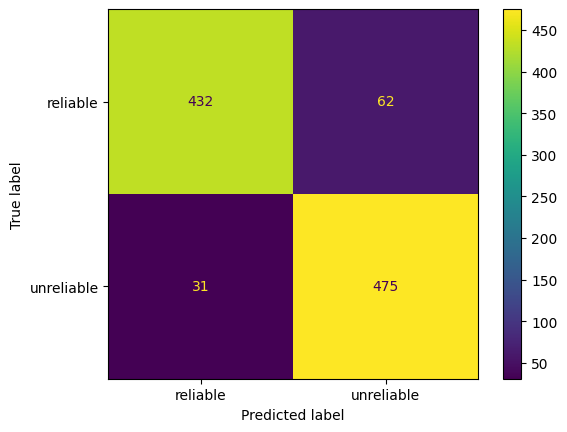

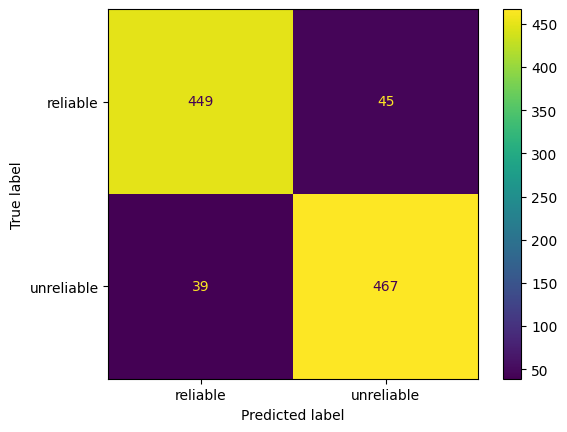

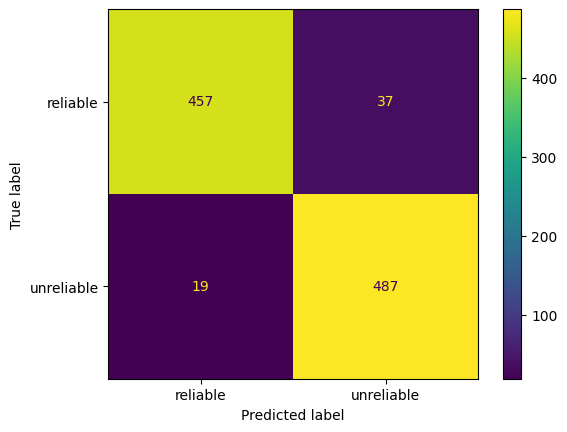

In [9]:
run_experiment(clf="gnb", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=(1,1))
run_experiment(clf="mnb", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=(1,1))
run_experiment(clf="knn", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=(1,1))
run_experiment(clf="svm", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=(1,1))

Classifier: mnb
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.899
Classifier: mnb
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.907
Classifier: mnb
Extraction: cv
ngram_range: (1, 1)
Accuracy: 0.899
Classifier: mnb
Extraction: cv
ngram_range: (1, 1)
Accuracy: 0.907
Classifier: mnb
Extraction: hash
ngram_range: (1, 1)
Accuracy: 0.899
Classifier: mnb
Extraction: hash
ngram_range: (1, 1)
Accuracy: 0.907


0.907

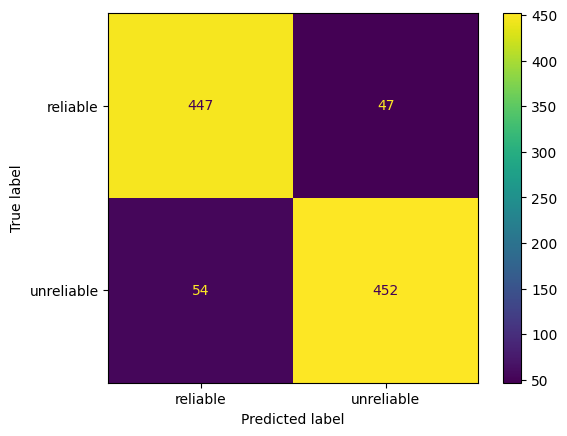

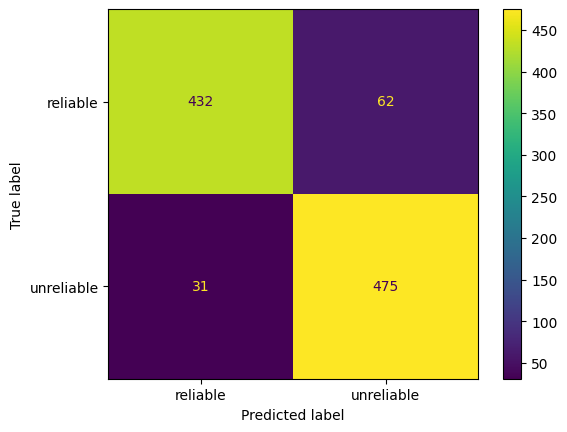

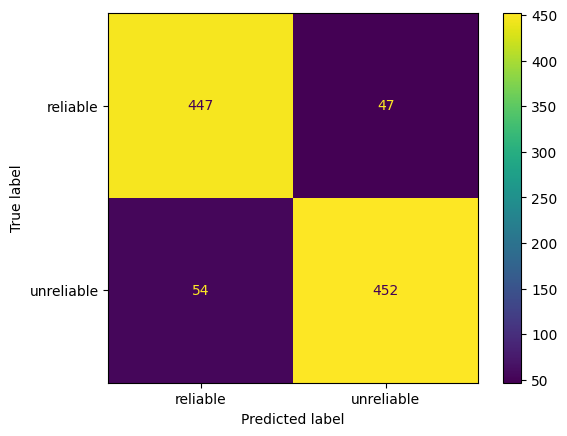

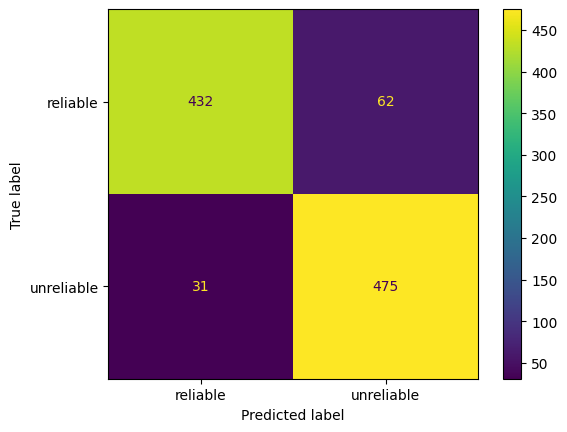

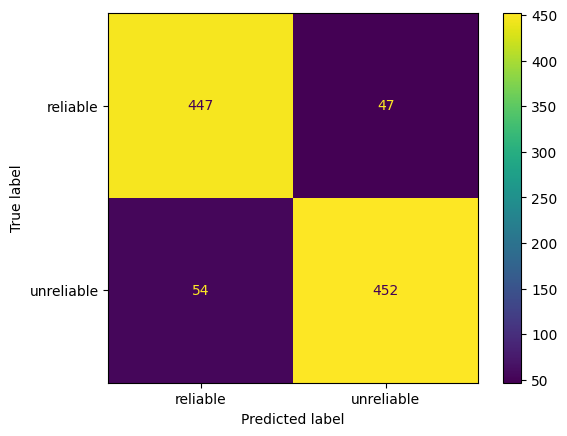

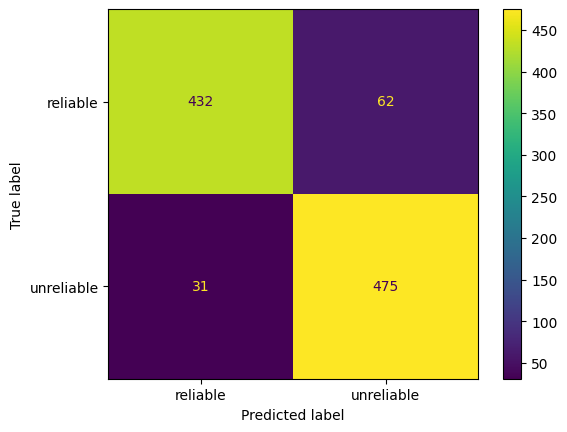

In [10]:
run_experiment(clf="mnb", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=(1,1))
run_experiment(clf="mnb", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=(1,1))
run_experiment(clf="mnb", extraction="cv", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=(1,1))
run_experiment(clf="mnb", extraction="cv", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=(1,1))
run_experiment(clf="mnb", extraction="hash", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=(1,1))
run_experiment(clf="mnb", extraction="hash", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classifier: svm
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.942


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classifier: svm
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.939


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classifier: svm
Extraction: hash
ngram_range: (1, 1)
Accuracy: 0.944


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classifier: svm
Extraction: hash
ngram_range: (1, 1)
Accuracy: 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classifier: svm
Extraction: cv
ngram_range: (1, 1)
Accuracy: 0.944


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classifier: svm
Extraction: cv
ngram_range: (1, 1)
Accuracy: 0.938
Classifier: gnb
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.79
Classifier: gnb
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.842
Classifier: gnb
Extraction: hash
ngram_range: (1, 1)
Accuracy: 0.79
Classifier: gnb
Extraction: hash
ngram_range: (1, 1)
Accuracy: 0.842
Classifier: gnb
Extraction: cv
ngram_range: (1, 1)
Accuracy: 0.79
Classifier: gnb
Extraction: cv
ngram_range: (1, 1)
Accuracy: 0.842
Classifier: knn
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.91
Classifier: knn
Extraction: tfidf
ngram_range: (1, 1)
Accuracy: 0.91
Classifier: knn
Extraction: hash
ngram_range: (1, 1)
Accuracy: 0.91
Classifier: knn
Extraction: hash
ngram_range: (1, 1)
Accuracy: 0.91
Classifier: knn
Extraction: cv
ngram_range: (1, 1)
Accuracy: 0.91
Classifier: knn
Extraction: cv
ngram_range: (1, 1)
Accuracy: 0.91


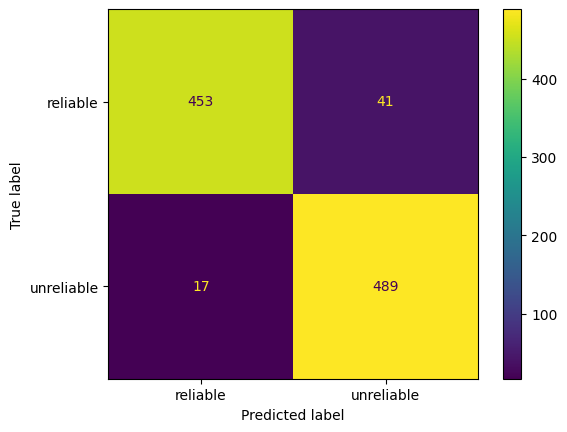

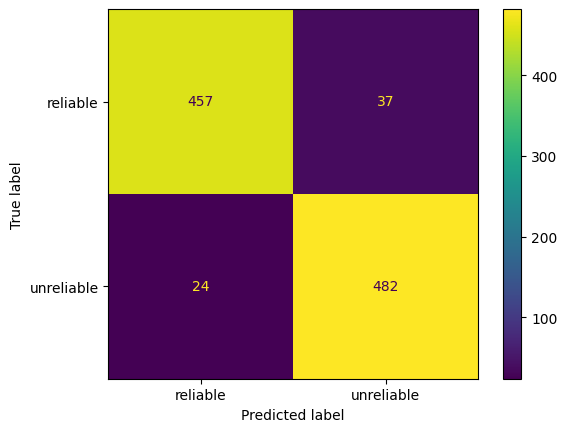

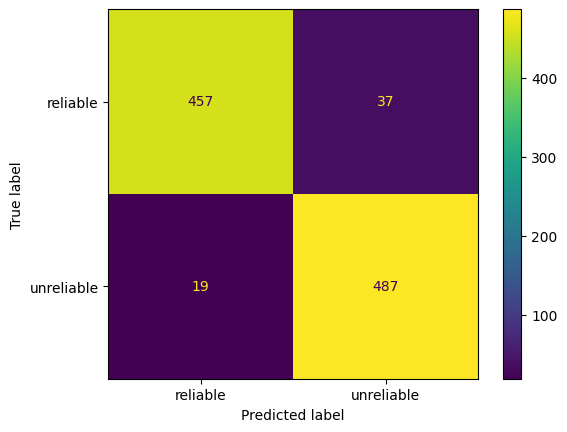

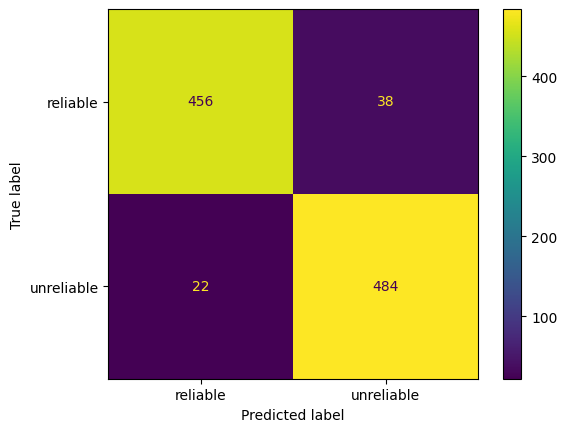

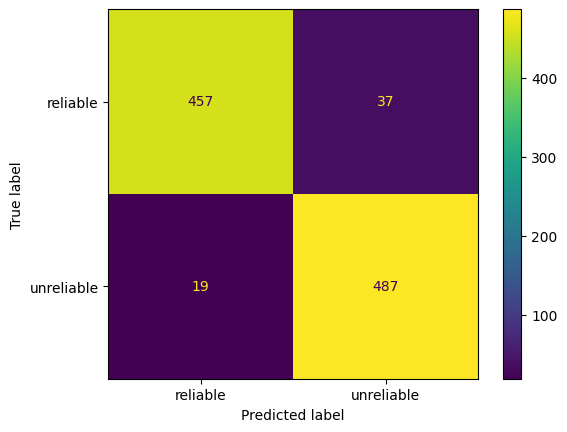

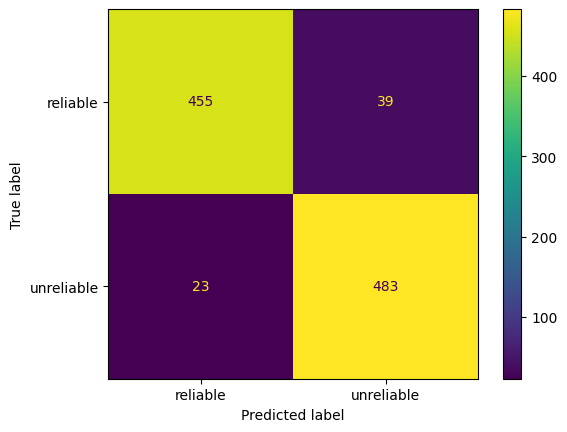

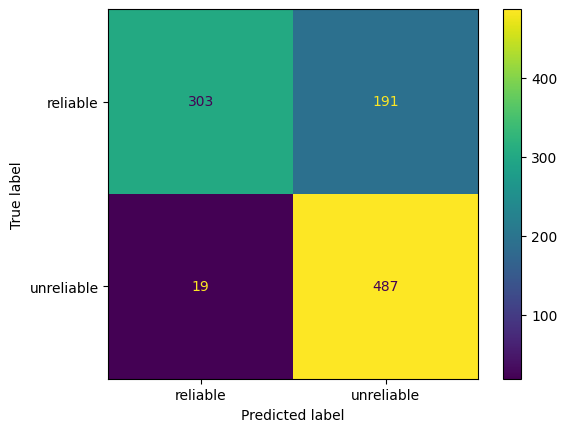

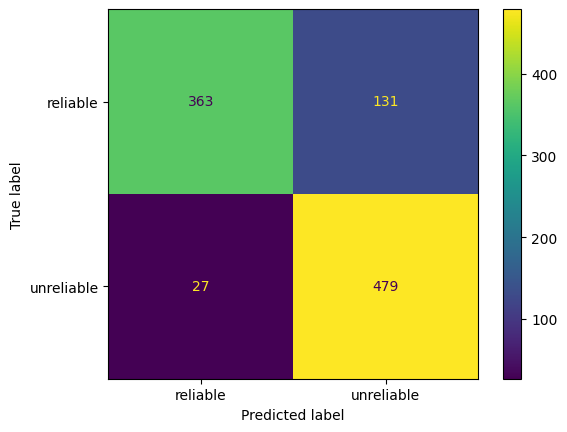

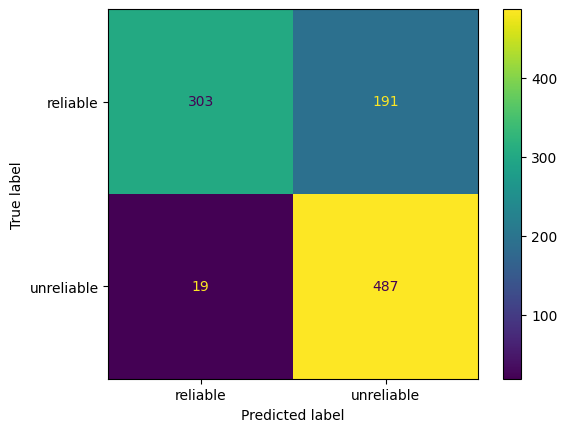

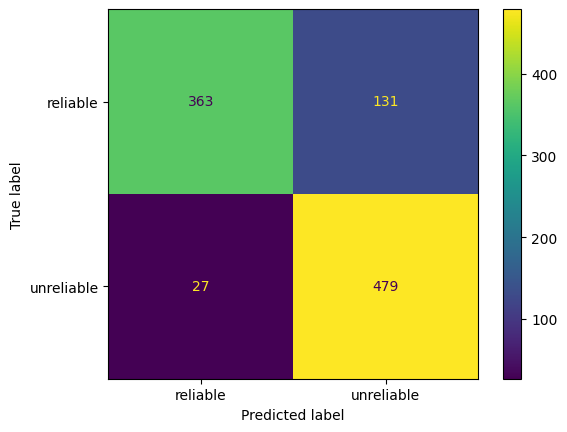

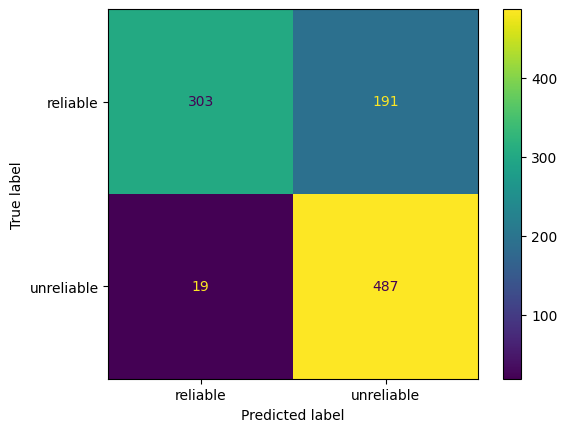

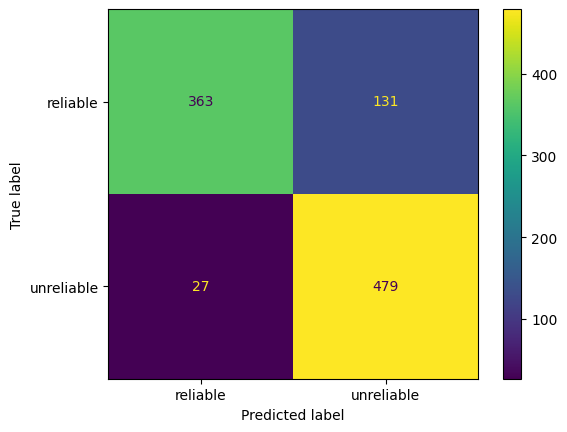

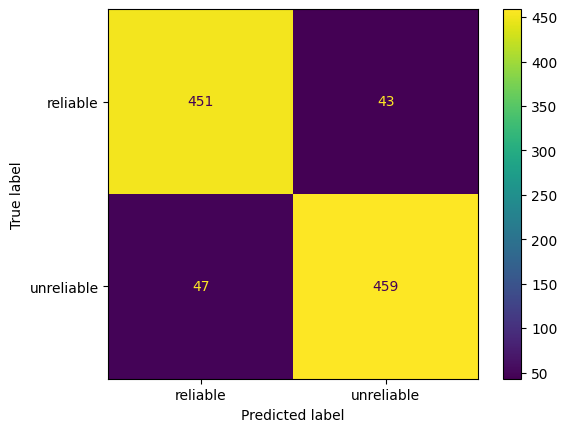

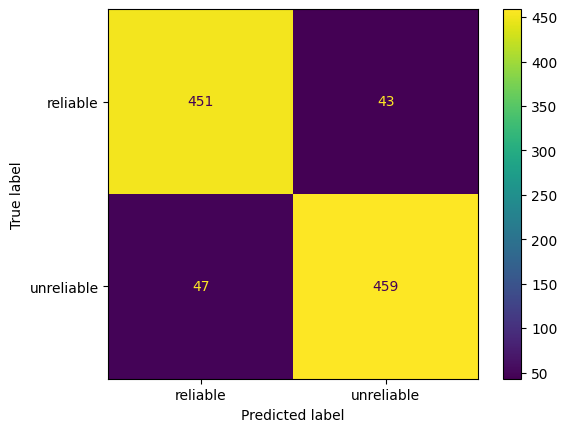

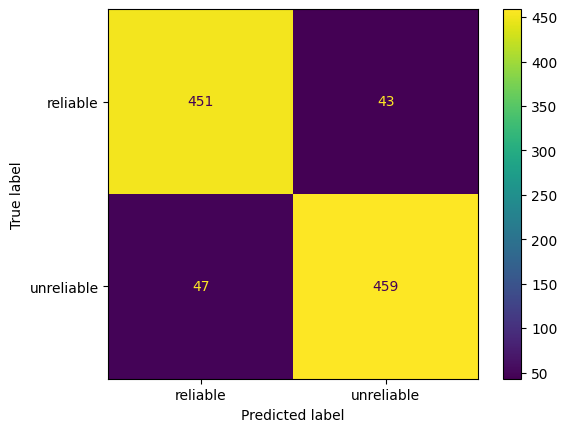

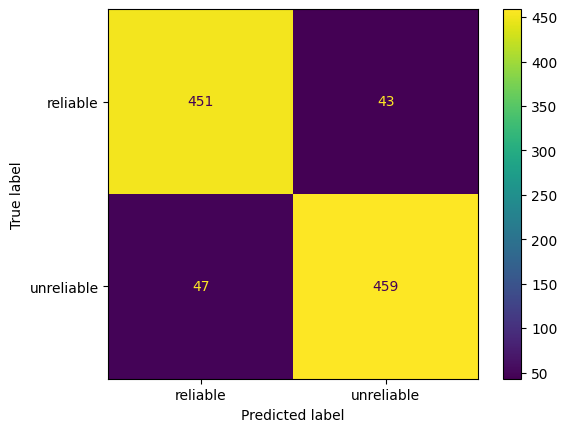

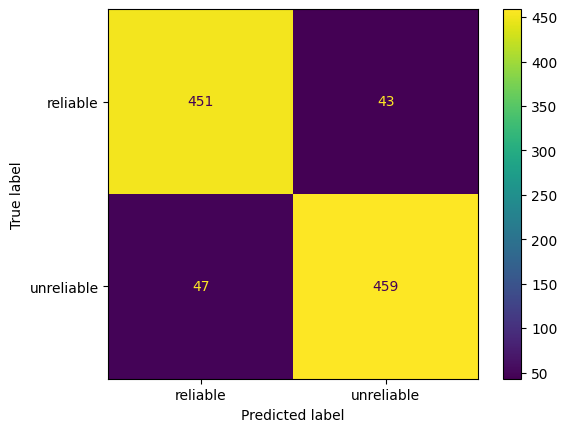

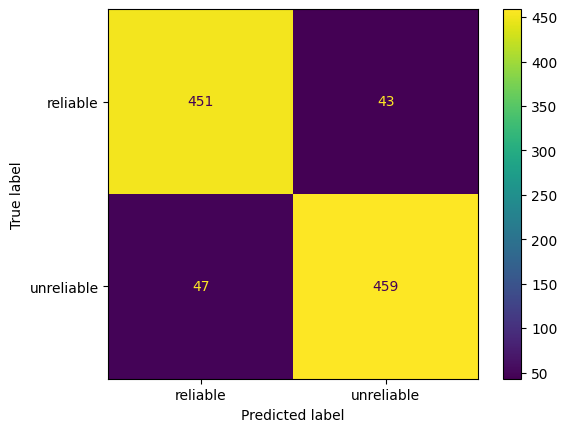

In [11]:
# @title Basic Tests
accs = []
ngram_range = (1, 1)
#SVM Tests
acc1 = run_experiment(clf="svm", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=ngram_range)
acc2 = run_experiment(clf="svm", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=ngram_range)
acc3 = run_experiment(clf="svm", extraction="hash", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=ngram_range)
acc4 = run_experiment(clf="svm", extraction="hash", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=ngram_range)
acc5 = run_experiment(clf="svm", extraction="cv", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=ngram_range)
acc6 = run_experiment(clf="svm", extraction="cv", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=ngram_range)

accs.append([acc1, "svm", "tfidf", "chi2", ngram_range])
accs.append([acc2, "svm", "tfidf", "f_classif", ngram_range])
accs.append([acc3, "svm", "hash", "chi2", ngram_range])
accs.append([acc4, "svm", "hash", "f_classif", ngram_range])
accs.append([acc5, "svm", "cv", "chi2", ngram_range])
accs.append([acc6, "svm", "cv", "f_classif", ngram_range])

#GNB Tests

acc7 = run_experiment(clf="gnb", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=ngram_range)
acc8 = run_experiment(clf="gnb", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=ngram_range)
acc9 = run_experiment(clf="gnb", extraction="hash", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=ngram_range)
acc10 = run_experiment(clf="gnb", extraction="hash", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=ngram_range)
acc11 = run_experiment(clf="gnb", extraction="cv", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=ngram_range)
acc12 = run_experiment(clf="gnb", extraction="cv", lowercase=True, stop_words=1, norm="l2", selection="f_classif", feat="combined", ngram_range=ngram_range)

accs.append([acc7, "gnb", "tfidf", "chi2", ngram_range])
accs.append([acc8, "gnb", "tfidf", "f_classif", ngram_range])
accs.append([acc9, "gnb", "hash", "chi2", ngram_range])
accs.append([acc10, "gnb", "hash", "f_classif", ngram_range])
accs.append([acc11, "gnb", "cv", "chi2", ngram_range])
accs.append([acc12, "gnb", "cv", "f_classif", ngram_range])

#kNN Tests

acc13 = run_experiment(clf="knn", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=ngram_range)
acc14 = run_experiment(clf="knn", extraction="tfidf", lowercase=True, stop_words=1, norm="l2", selection=f_classif, feat="combined", ngram_range=ngram_range)
acc15 = run_experiment(clf="knn", extraction="hash", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=ngram_range)
acc16 = run_experiment(clf="knn", extraction="hash", lowercase=True, stop_words=1, norm="l2", selection=f_classif, feat="combined", ngram_range=ngram_range)
acc17 = run_experiment(clf="knn", extraction="cv", lowercase=True, stop_words=1, norm="l2", selection="chi2", feat="combined", ngram_range=ngram_range)
acc18 = run_experiment(clf="knn", extraction="cv", lowercase=True, stop_words=1, norm="l2", selection=f_classif, feat="combined", ngram_range=ngram_range)

accs.append([acc13, "knn", "tfidf", "chi2", ngram_range])
accs.append([acc14, "knn", "tfidf", "f_classif", ngram_range])
accs.append([acc15, "knn", "hash", "chi2", ngram_range])
accs.append([acc16, "knn", "hash", "f_classif", ngram_range])
accs.append([acc17, "knn", "cv", "chi2", ngram_range])
accs.append([acc18, "knn", "cv", "f_classif", ngram_range])


In [12]:
for tuple in accs:
  print(tuple)

[0.942, 'svm', 'tfidf', 'chi2', (1, 1)]
[0.939, 'svm', 'tfidf', 'f_classif', (1, 1)]
[0.944, 'svm', 'hash', 'chi2', (1, 1)]
[0.94, 'svm', 'hash', 'f_classif', (1, 1)]
[0.944, 'svm', 'cv', 'chi2', (1, 1)]
[0.938, 'svm', 'cv', 'f_classif', (1, 1)]
[0.79, 'gnb', 'tfidf', 'chi2', (1, 1)]
[0.842, 'gnb', 'tfidf', 'f_classif', (1, 1)]
[0.79, 'gnb', 'hash', 'chi2', (1, 1)]
[0.842, 'gnb', 'hash', 'f_classif', (1, 1)]
[0.79, 'gnb', 'cv', 'chi2', (1, 1)]
[0.842, 'gnb', 'cv', 'f_classif', (1, 1)]
[0.91, 'knn', 'tfidf', 'chi2', (1, 1)]
[0.91, 'knn', 'tfidf', 'f_classif', (1, 1)]
[0.91, 'knn', 'hash', 'chi2', (1, 1)]
[0.91, 'knn', 'hash', 'f_classif', (1, 1)]
[0.91, 'knn', 'cv', 'chi2', (1, 1)]
[0.91, 'knn', 'cv', 'f_classif', (1, 1)]


Everythign below this was for previous testing

In [13]:
# @title Reading Data
df = pd.read_csv("train.csv", nrows=6000, engine="python")

# Formatting/Splitting Data
df["combined"] = df['title'] + ' ' + df['author'] + ' ' + df['text']
labels = [0, 1]

X = df[["id", "title", "author", "text", "combined"]]
y = df["label"]
X.fillna("", inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Transforming Data
vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=1, stop_words="english")

X_train_trans_text = vect.fit_transform(X_train["text"])
X_train_trans_text_dense = X_train_trans_text.toarray()
X_test_trans_text = vect.transform(X_test["text"])
X_test_trans_text_dense = X_test_trans_text.toarray()

X_train_trans_title = vect.fit_transform(X_train["title"])
X_train_trans_title_dense = X_train_trans_title.toarray()
X_test_trans_title = vect.transform(X_test["title"])
X_test_trans_title_dense = X_test_trans_title.toarray()

X_train_trans_author = vect.fit_transform(X_train["author"])
X_train_trans_author_dense = X_train_trans_author.toarray()
X_test_trans_author = vect.transform(X_test["author"])
X_test_trans_author_dense = X_test_trans_author.toarray()

X_train_trans_comb = vect.fit_transform(X_train["combined"])
X_train_trans_comb_dense = X_train_trans_comb.toarray()
X_test_trans_comb = vect.transform(X_test["combined"])
X_test_trans_comb_dense = X_test_trans_comb.toarray()

<ipython-input-13-efdbdc63f227>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna("", inplace=True)


Accuracy: 0.7783333333333333


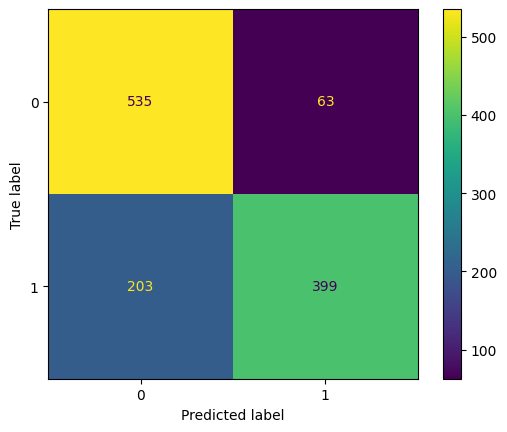

In [14]:
# @title GNB for Text
gnb_classifier_text = GaussianNB()
gnb_classifier_text.fit(X_train_trans_text_dense, y_train)

# Predict
y_pred_gnb_text = gnb_classifier_text.predict(X_test_trans_text_dense)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_gnb_text)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_gnb_text = confusion_matrix(y_test, y_pred_gnb_text, labels=labels)
disp_gnb_text = ConfusionMatrixDisplay(confusion_matrix=cm_gnb_text, display_labels=labels)
disp_gnb_text.plot()

Accuracy: 0.6583333333333333


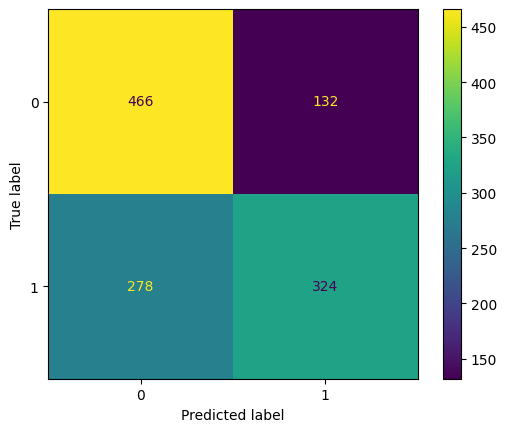

In [15]:
# @title GNB for Title
gnb_classifier_title = GaussianNB()
gnb_classifier_title.fit(X_train_trans_title_dense, y_train)

# Predict
y_pred_gnb_title = gnb_classifier_title.predict(X_test_trans_title_dense)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_gnb_title)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_gnb_title = confusion_matrix(y_test, y_pred_gnb_title, labels=labels)
disp_gnb_title = ConfusionMatrixDisplay(confusion_matrix=cm_gnb_title, display_labels=labels)
disp_gnb_title.plot()

Accuracy: 0.7825


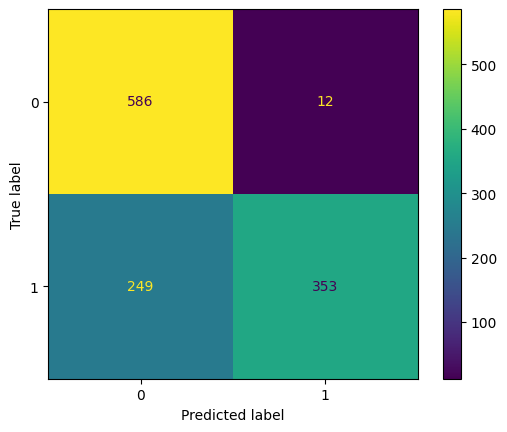

In [16]:
# @title GNB for Author
gnb_classifier_author = GaussianNB()
gnb_classifier_author.fit(X_train_trans_author_dense, y_train)

# Predict
y_pred_gnb_author = gnb_classifier_author.predict(X_test_trans_author_dense)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_gnb_author)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_gnb_author = confusion_matrix(y_test, y_pred_gnb_author, labels=labels)
disp_gnb_author = ConfusionMatrixDisplay(confusion_matrix=cm_gnb_author, display_labels=labels)
disp_gnb_author.plot()

Accuracy: 0.8541666666666666


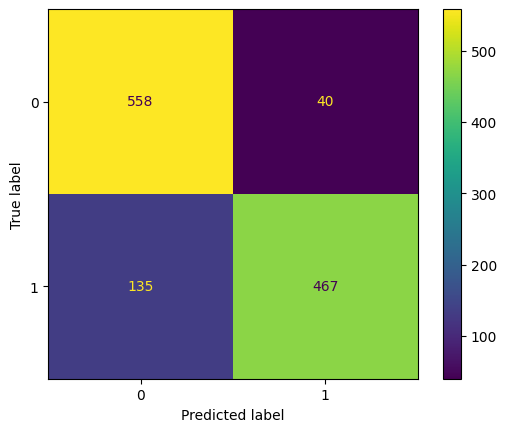

In [17]:
# @title GNB for combined
gnb_classifier_comb = GaussianNB()
gnb_classifier_comb.fit(X_train_trans_comb_dense, y_train)

# Predict
y_pred_gnb_comb = gnb_classifier_comb.predict(X_test_trans_comb_dense)

# Calculate Accuarcy
accuracy = accuracy_score(y_test, y_pred_gnb_comb)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_gnb_comb = confusion_matrix(y_test, y_pred_gnb_comb, labels=labels)
disp_gnb_comb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb_comb, display_labels=labels)
disp_gnb_comb.plot()

Accuracy: 0.5041666666666667


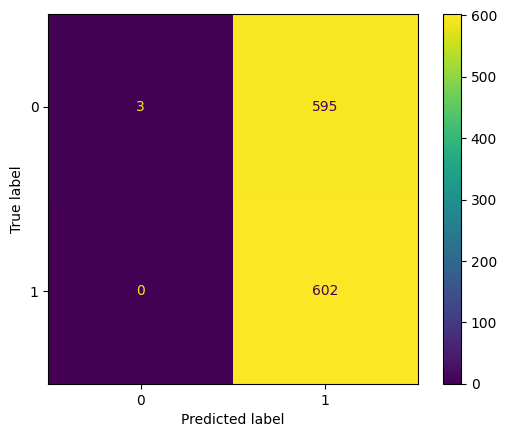

In [18]:
# @title k-NN for Text
kNN_classifier_text = KNeighborsClassifier(n_neighbors=3)
kNN_classifier_text.fit(X_train_trans_text_dense, y_train)

# Predict
y_pred_knn_text = kNN_classifier_text.predict(X_test_trans_text_dense)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_knn_text)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_knn_text = confusion_matrix(y_test, y_pred_knn_text, labels=labels)
disp_knn_text = ConfusionMatrixDisplay(confusion_matrix=cm_knn_text, display_labels=labels)
disp_knn_text.plot()

Accuracy: 0.5075


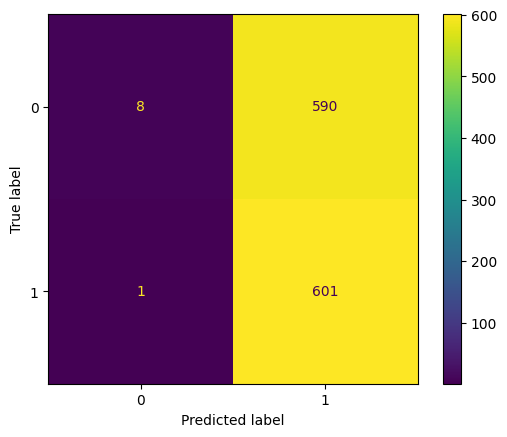

In [19]:
# @title k-NN for Title
kNN_classifier_title = KNeighborsClassifier(n_neighbors=3)
kNN_classifier_title.fit(X_train_trans_title_dense, y_train)

# Predict
y_pred_knn_title = kNN_classifier_title.predict(X_test_trans_title_dense)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_knn_title)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_knn_title = confusion_matrix(y_test, y_pred_knn_title, labels=labels)
disp_knn_title = ConfusionMatrixDisplay(confusion_matrix=cm_knn_title, display_labels=labels)
disp_knn_title.plot()

Accuracy: 0.9166666666666666


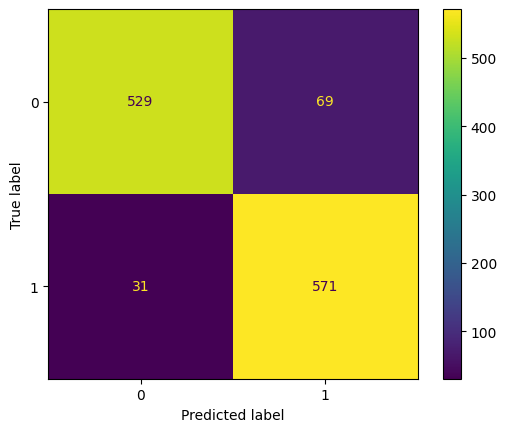

In [20]:
# @title k-NN for Author
kNN_classifier_author = KNeighborsClassifier(n_neighbors=3)
kNN_classifier_author.fit(X_train_trans_author_dense, y_train)

# Predict
y_pred_knn_author = kNN_classifier_author.predict(X_test_trans_author_dense)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_knn_author)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_knn_author = confusion_matrix(y_test, y_pred_knn_author, labels=labels)
disp_knn_author = ConfusionMatrixDisplay(confusion_matrix=cm_knn_author, display_labels=labels)
disp_knn_author.plot()

In [ ]:
# @title k-NN for Combined
kNN_classifier_comb = KNeighborsClassifier(n_neighbors=3)
kNN_classifier_comb.fit(X_train_trans_comb_dense, y_train)

# Predict
y_pred_knn_comb = kNN_classifier_comb.predict(X_test_trans_comb_dense)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_knn_comb)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_knn_comb = confusion_matrix(y_test, y_pred_knn_comb, labels=labels)
disp_knn_comb = ConfusionMatrixDisplay(confusion_matrix=cm_knn_comb, display_labels=labels)
disp_knn_comb.plot()

In [ ]:
# @title SVM for Text
svm_classifier_text = LinearSVC()
svm_classifier_text.fit(X_train_trans_text_dense, y_train)

# Predict
y_pred_svm_text = svm_classifier_text.predict(X_test_trans_text_dense)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_svm_text)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_svm_text = confusion_matrix(y_test, y_pred_svm_text, labels=labels)
disp_svm_text = ConfusionMatrixDisplay(confusion_matrix=cm_svm_text, display_labels=labels)
disp_svm_text.plot()

In [ ]:
# @title SVM for Title
svm_classifier_title = LinearSVC()
svm_classifier_title.fit(X_train_trans_title_dense, y_train)

# Predict
y_pred_svm_title = svm_classifier_title.predict(X_test_trans_title_dense)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_svm_title)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_svm_title = confusion_matrix(y_test, y_pred_svm_title, labels=labels)
disp_svm_title = ConfusionMatrixDisplay(confusion_matrix=cm_svm_title, display_labels=labels)
disp_svm_title.plot()

In [ ]:
# @title SVM for Author
svm_classifier_author = LinearSVC()
svm_classifier_author.fit(X_train_trans_author_dense, y_train)

# Predict
y_pred_svm_author = svm_classifier_author.predict(X_test_trans_author_dense)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_svm_author)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_svm_author = confusion_matrix(y_test, y_pred_svm_author, labels=labels)
disp_svm_author = ConfusionMatrixDisplay(confusion_matrix=cm_svm_author, display_labels=labels)
disp_svm_author.plot()

In [ ]:
# @title SVM for Combined
svm_classifier_comb = LinearSVC()
svm_classifier_comb.fit(X_train_trans_comb_dense, y_train)

# Predict
y_pred_svm_comb = svm_classifier_comb.predict(X_test_trans_comb_dense)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_svm_comb)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm_svm_comb = confusion_matrix(y_test, y_pred_svm_comb, labels=labels)
disp_svm_comb = ConfusionMatrixDisplay(confusion_matrix=cm_svm_comb, display_labels=labels)
disp_svm_comb.plot()